In [1]:
## load the K-nn algorithm for nearest neighbors 
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd 
import networkx as nx
from networkx.algorithms import bipartite

from nxviz import (CircosPlot, HivePlot, ArcPlot)
from pylab import rcParams

/Users/Eric/.local/share/virtualenvs/CircularEconomy-7zFOP8Dc/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


## Cleaning it up and making functions out of it all

In [2]:
## autoreload 
%load_ext autoreload
%autoreload 2

In [8]:
## import helper functions 
from utils.helpers import (load_dataframe, clean_dataframe, get_edge_list)

## import sepparate helper functions 
from utils.graph import (make_bipartite_graph, show_graph)

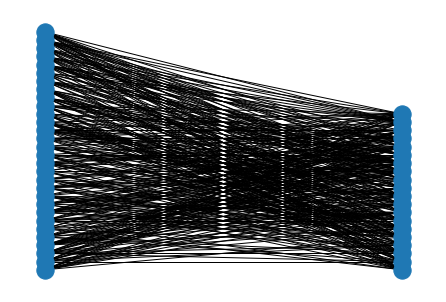

In [9]:
PATH = "./data/data.csv"

## load the dataframe 
df = load_dataframe(PATH)

## clean the dataframe 
df = clean_dataframe(df)

## get the edge list, filtered 
edge_list = get_edge_list(df, filter=True)

## make the graph and visualize it 
G, pos = make_bipartite_graph(df)
show_graph(G, pos)


# End: cleaning

### k-NN: Nearest Neighbors

In [ ]:
## load a dataset 
X, y  = load_iris(return_X_y=True)

## number of neighbors to use
k = 5

## instantiate the object 
knn = NearestNeighbors(n_neighbors=k)

## fit the object to the data
knn.fit(X)

## find the k nearest neighbors of the first example
print(knn.kneighbors(X[0:1]))

## plot the data
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:

# ###
# ### MAKING THE EDGE LIST
# ###

# ## get the processses 
# processes = list(df.index)
# ## get the materials 
# materials = list(df.columns)

# ## get the edge lists 
# ## make an edgelist dictionary 
# edge_list = []
# for process in df.index:
#     for material in df.columns:
#         #d = dict(A=process, B=material, energy=df.loc[process, material])
#         if df.loc[process, material] != 0:
#             edge_list.append((process, material))
#         #edge_list.append((process, material))#, df.loc[process, material]))



# ###
# ### MAKING THE BIGRAPH
# ###

# B = nx.Graph()
# # Add nodes with the node attribute "bipartite"
# B.add_nodes_from(processes, bipartite=0) ## our nodes are the processes

# B.add_nodes_from(materials, bipartite=1) ## our nodes are the materials

# # Add edges only between nodes of opposite node sets
# B.add_edges_from(edge_list)


# ## get the bipapartite parts 
# # u = [n for n in B.nodes if B.nodes[n]['bipartite'] == 0]
# # v = [n for n in B.nodes if B.nodes[n]['bipartite'] == 1]

# ###
# ### MAKING THE BIGRAPH POSITION
# ###
# # Separate by group
# left_set, right_set = bipartite.sets(B)
# pos = {}

# # Update position for node from each group
# pos.update((node, (1, index)) for index, node in enumerate(left_set))
# pos.update((node, (2, index)) for index, node in enumerate(right_set))


# ## for each connection, add the corresponding value from the dataframe
# for edge in B.edges():
#     B[edge[0]][edge[1]]['weight'] = df.loc[edge[0], edge[1]]

# nx.draw(B, pos=pos)
# plt.show()


In [ ]:
# all_edges = B.edges(data=True)
# valid_eges = []
# for i in all_edges:
#     if i[2]['weight'] != 0:
#         valid_eges.append(i)

In [ ]:
# valid_edges = [(x[0],x[1]) for x in valid_eges]

In [ ]:
# B = nx.Graph()
# # Add nodes with the node attribute "bipartite"
# B.add_nodes_from(processes, bipartite=0) ## our nodes are the processes

# B.add_nodes_from(materials, bipartite=1) ## our nodes are the materials

# # Add edges only between nodes of opposite node sets
# B.add_edges_from(valid_edges)


# ## get the bipapartite parts 
# # u = [n for n in B.nodes if B.nodes[n]['bipartite'] == 0]
# # v = [n for n in B.nodes if B.nodes[n]['bipartite'] == 1]

# ###
# ### MAKING THE BIGRAPH POSITION
# ###
# # Separate by group
# left_set, right_set = bipartite.sets(B)
# pos = {}

# # Update position for node from each group
# pos.update((node, (1, index)) for index, node in enumerate(left_set))
# pos.update((node, (2, index)) for index, node in enumerate(right_set))


# ## for each connection, add the corresponding value from the dataframe
# for edge in B.edges():
#     B[edge[0]][edge[1]]['weight'] = df.loc[edge[0], edge[1]]

# nx.draw(B, pos=pos)
# plt.show()

## Other Plots (Prettier)

In [ ]:

## set the figure size 
rcParams['figure.figsize'] = (12, 12)


c = CircosPlot(B, node_grouping='bipartite',node_color='bipartite')

In [ ]:
a = ArcPlot(B)

In [ ]:
c = HivePlot(B, node_grouping='bipartite',node_color='bipartite')
#c.annotate.text(B, group_by="group", offset=3.14159 / 12)
#c.annotate.hive_group(B, group_by="group", offset=3.14159 / 12)
